In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('df_2021_LIMPIO.csv')

/var/folders/r7/9s3q_3s92lz959y8hxyn782c0000gn/T/ipykernel_1964/2337406288.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('df_2021_LIMPIO.csv')


In [7]:
df1.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,pagare,capital,fechaAperturaCredito,idBancoStr,idRespuestaBancoStr
0,101188,599055,27240538,2,1765.53,1765.53,0.0,NaT,04,07/10/2022,183615.12,70000.00,2021-08-13,NaN,Cuenta Insuficiencia Fondos
1,100551,579674,27163668,21,506.38,506.38,0.0,NaT,DD00031,29/09/2022,48612.48,18204.19,2021-02-09,NaN,Cuenta con Insuficiencia de Fondos
2,100551,581020,27163709,21,4899.99,4899.99,0.0,NaT,DD00031,29/09/2022,470399.04,176153.00,2021-02-23,NaN,Cuenta con Insuficiencia de Fondos
3,100551,581980,27163662,127,444.82,444.82,0.0,NaT,DD00031,29/09/2022,16013.52,10000.00,2021-03-06,NaN,Cuenta con Insuficiencia de Fondos
4,100551,582409,27163723,21,847.85,847.85,0.0,NaT,DD00031,29/09/2022,81393.60,30480.00,2021-03-11,NaN,Cuenta con Insuficiencia de Fondos


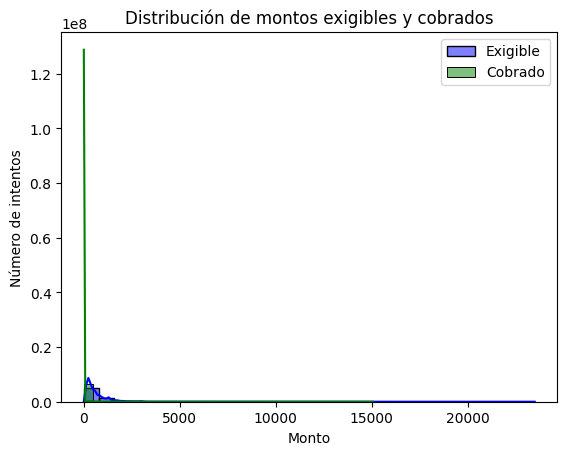

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de montos exigibles y cobrados
sns.histplot(df1['montoExigible'], bins=30, kde=True, color='blue', label='Exigible')
sns.histplot(df1['montoCobrado'], bins=30, kde=True, color='green', label='Cobrado')
plt.title("Distribución de montos exigibles y cobrados")
plt.xlabel("Monto")
plt.ylabel("Número de intentos")
plt.legend()
plt.show()


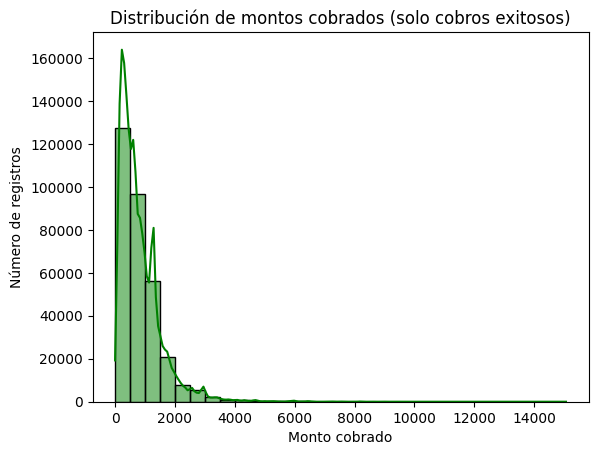

In [12]:
df_exitosos = df1[df1['montoCobrado'] > 0]

sns.histplot(df_exitosos['montoCobrado'], bins=30, kde=True, color='green')
plt.title("Distribución de montos cobrados (solo cobros exitosos)")
plt.xlabel("Monto cobrado")
plt.ylabel("Número de registros")
plt.show()


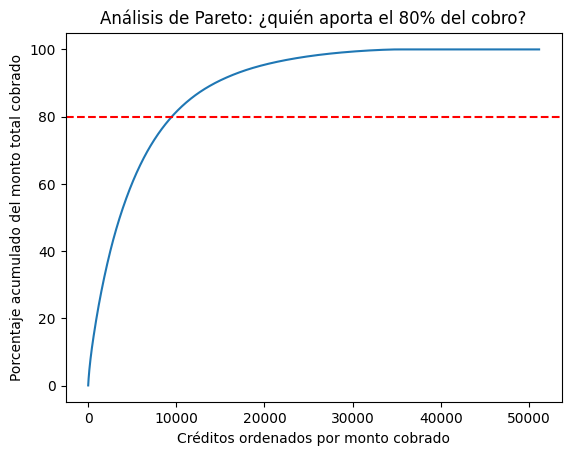

9483 créditos (~18.54%) aportan el 80% del monto total cobrado.


In [14]:
# Agrupamos por crédito y sumamos el monto cobrado
agrupado = df1.groupby('idCredito')['montoCobrado'].sum().sort_values(ascending=False).reset_index()

# Calculamos el acumulado y el porcentaje acumulado
agrupado['cobro_acumulado'] = agrupado['montoCobrado'].cumsum()
total_cobrado = agrupado['montoCobrado'].sum()
agrupado['porcentaje_acumulado'] = agrupado['cobro_acumulado'] / total_cobrado * 100

# Graficamos la curva de Pareto
sns.lineplot(data=agrupado, x=agrupado.index, y='porcentaje_acumulado')
plt.axhline(80, color='red', linestyle='--')
plt.title("Análisis de Pareto: ¿quién aporta el 80% del cobro?")
plt.xlabel("Créditos ordenados por monto cobrado")
plt.ylabel("Porcentaje acumulado del monto total cobrado")
plt.show()

# Mostrar cuántos créditos aportan el 80%
n_80 = agrupado[agrupado['porcentaje_acumulado'] <= 80].shape[0]
print(f"{n_80} créditos (~{n_80/agrupado.shape[0]*100:.2f}%) aportan el 80% del monto total cobrado.")


/var/folders/r7/9s3q_3s92lz959y8hxyn782c0000gn/T/ipykernel_1964/2257183551.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['fechaCobroBanco'] = pd.to_datetime(df1['fechaCobroBanco'], errors='coerce')
/var/folders/r7/9s3q_3s92lz959y8hxyn782c0000gn/T/ipykernel_1964/2257183551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mes'] = df_temp['fechaCobroBanco'].dt.to_period('M').dt.to_timestamp()


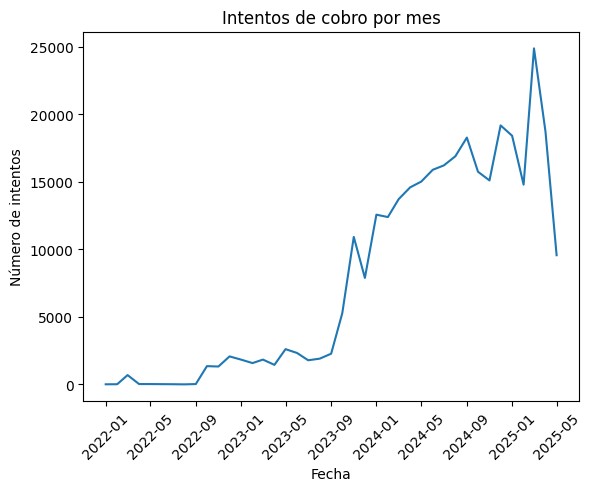

In [4]:
df1['fechaCobroBanco'] = pd.to_datetime(df1['fechaCobroBanco'], errors='coerce')
df_temp = df1.dropna(subset=['fechaCobroBanco'])
df_temp['mes'] = df_temp['fechaCobroBanco'].dt.to_period('M').dt.to_timestamp()

conteo_mensual = df_temp.groupby('mes').size().reset_index(name='intentos')
sns.lineplot(data=conteo_mensual, x='mes', y='intentos')
plt.title("Intentos de cobro por mes")
plt.xlabel("Fecha")
plt.ylabel("Número de intentos")
plt.xticks(rotation=45)
plt.show()


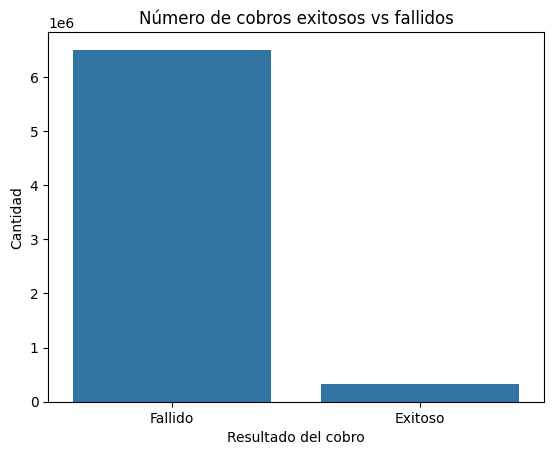

In [10]:
df1['resultado'] = df1['montoCobrado'].apply(lambda x: 'Exitoso' if x > 0 else 'Fallido')
sns.countplot(data=df1, x='resultado')
plt.title("Número de cobros exitosos vs fallidos")
plt.xlabel("Resultado del cobro")
plt.ylabel("Cantidad")
plt.show()


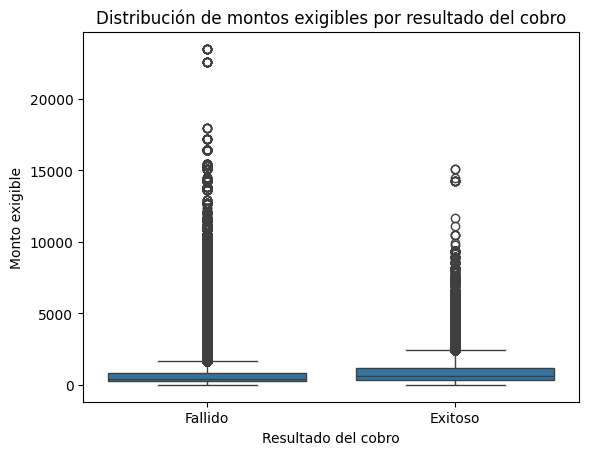

In [11]:
df1['resultado'] = df1['montoCobrado'].apply(lambda x: 'Exitoso' if x > 0 else 'Fallido')
sns.boxplot(data=df1, x='resultado', y='montoExigible')
plt.title("Distribución de montos exigibles por resultado del cobro")
plt.xlabel("Resultado del cobro")
plt.ylabel("Monto exigible")
plt.show()


In [16]:
# Crear columna binaria de éxito
df1['exitoso'] = df1['montoCobrado'] > 0

efectividad_banco = df1.groupby('idBanco').agg(
    intentos=('montoCobrado', 'count'),
    exitosos=('exitoso', 'sum')
).reset_index()

efectividad_banco['tasa_exito'] = efectividad_banco['exitosos'] / efectividad_banco['intentos']
efectividad_banco = efectividad_banco.sort_values(by='tasa_exito', ascending=False)

print("📊 Efectividad por Banco:")
print(efectividad_banco.head(10))






📊 Efectividad por Banco:
    idBanco  intentos  exitosos  tasa_exito
9        72    265605     91490    0.344459
2        14    370862     68257    0.184050
11      132        64        10    0.156250
3        21    100400      7737    0.077062
4        30       843        56    0.066429
12      137       891        54    0.060606
5        36       275        16    0.058182
6        44      2220        68    0.030631
1        12   3667625     95355    0.025999
0         2   2399054     55977    0.023333


In [17]:
if 'idEmisora' in df1.columns:
    efectividad_emisora = df1.groupby('idEmisora').agg(
        intentos=('montoCobrado', 'count'),
        exitosos=('exitoso', 'sum')
    ).reset_index()

    efectividad_emisora['tasa_exito'] = efectividad_emisora['exitosos'] / efectividad_emisora['intentos']
    efectividad_emisora = efectividad_emisora.sort_values(by='tasa_exito', ascending=False)

    print("📊 Efectividad por Emisora:")
    print(efectividad_emisora.head(10))
else:
    print("⚠️ No se encontró la columna 'idEmisora'.")


⚠️ No se encontró la columna 'idEmisora'.


In [19]:
df_estrategia = pd.read_csv('features_entrenamiento_con_estrategia.csv')
df_estrategia.head()

,idCredito,n_intentos,n_exitosos,n_fallidos,porcentaje_exito,dias_desde_ultimo_pago,max_monto_cobrado,avg_monto_cobrado,fallo_2_ultimos,estrategia_sugerida
0,577278,1,0,1,0.0,NaN,0.0,0.0,0,inmediato
1,577279,1,0,1,0.0,NaN,0.0,0.0,0,inmediato
2,577281,2,1,1,0.5,1157.0,1843.0,921.5,0,inmediato
3,577284,39,0,39,0.0,NaN,0.0,0.0,1,despriorizado
4,577285,2,0,2,0.0,NaN,0.0,0.0,1,despriorizado


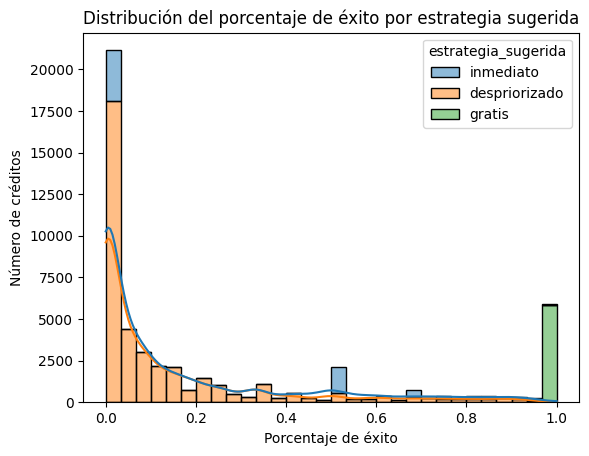

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_estrategia, x='porcentaje_exito', hue='estrategia_sugerida', bins=30, kde=True, multiple='stack')
plt.title("Distribución del porcentaje de éxito por estrategia sugerida")
plt.xlabel("Porcentaje de éxito")
plt.ylabel("Número de créditos")
plt.show()


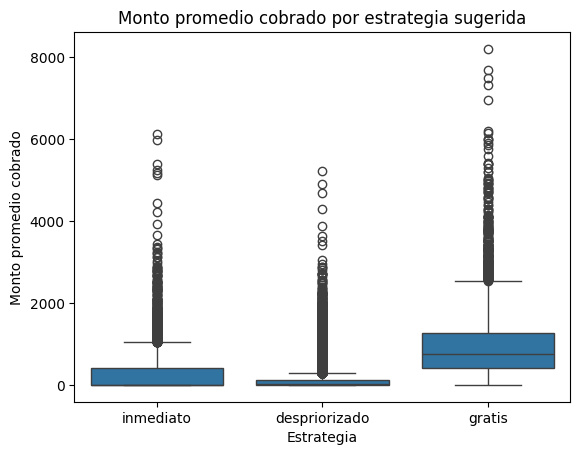

In [21]:
sns.boxplot(data=df_estrategia, x='estrategia_sugerida', y='avg_monto_cobrado')
plt.title("Monto promedio cobrado por estrategia sugerida")
plt.xlabel("Estrategia")
plt.ylabel("Monto promedio cobrado")
plt.show()


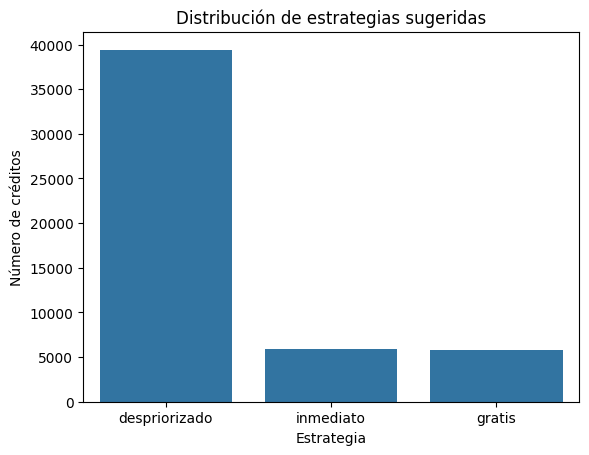

In [22]:
sns.countplot(data=df_estrategia, x='estrategia_sugerida', order=df_estrategia['estrategia_sugerida'].value_counts().index)
plt.title("Distribución de estrategias sugeridas")
plt.xlabel("Estrategia")
plt.ylabel("Número de créditos")
plt.show()


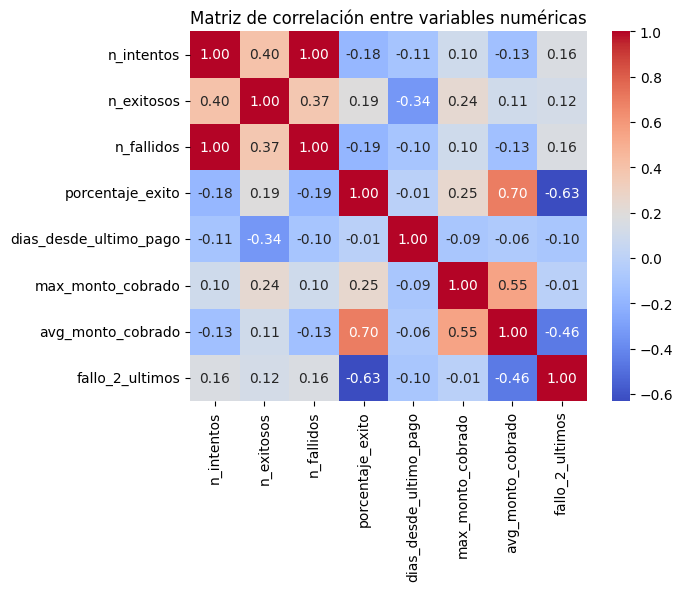

In [23]:
corr = df_estrategia.drop(columns=['idCredito']).select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


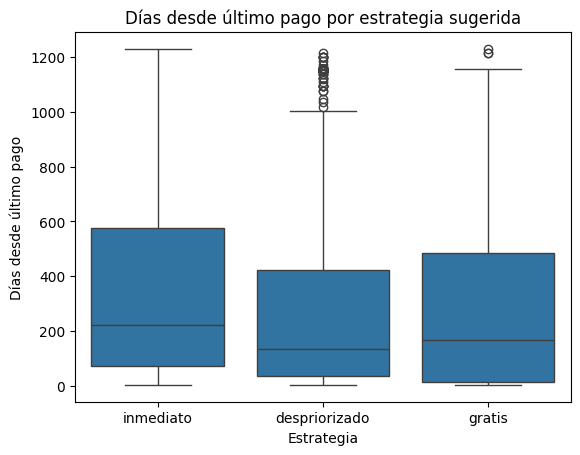

In [24]:
sns.boxplot(data=df_estrategia, x='estrategia_sugerida', y='dias_desde_ultimo_pago')
plt.title("Días desde último pago por estrategia sugerida")
plt.xlabel("Estrategia")
plt.ylabel("Días desde último pago")
plt.show()
